In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SIGNALscripts import plots
import SIGNALscripts.functions as f 

SIGNALscripts.config  loaded!
SIGNALscripts.notebooks loaded!


# Auswertung Residuallast-Signale
greift auf die Datei 'RES_pro_Stunde.csv' und die eingegebenen csv-Dateien der Schaltsignale zu.


## Inhalt
- Häufigkeiten
    - Anteil positiver/negativer Stunden insgesamt
    - Längste positive Phase/längste negative Phase
    - Phasenlängen von x Stunden negativ/positiv
- Zusammenhang mit der Residuallast
    - Häufigkeit Signal positiv und RES > 0 
    - Häufigkeit Signal negativ und RES < 0
 
### Input
- dateien: Namen der Dateien, die die Signale enthalten
- names: Namen, die später für die Identifikation in diesem Notebook verwendet werden können (Anzahl Dateinamen und Namen muss übereinstimmen)
Die Dateien, die importiert werden sollen, im folder "result_files" ablegen, der sich im gleichen Ordner wie das Notebook befindet (sofern es nicht die outputdateien des Auswertungs-Skripts sind). 

In [2]:
###
dateien = ['Schaltsignal_RES1.csv', 'Schaltsignal_RES2.csv', 'Schaltsignal_RES3.csv']
names = ['Signal 1', 'Signal 2', 'Signal 3']
resload = pd.read_csv('result_files/RES_pro_Stunde.csv', header = 1, names = ['snapshots', 'signal'])
###
sdf = f.import_func(dateien, names)

## Anforderungen an das Dataframe
- csv-file mit einer header-Zeile und zwei Spalten
    - erste Spalte: Index bzw. Datums- und Zeitangaben
    - zweite Spalte: Signal
- Signal: binäres Signal x mit $x \in [0,1]$
- mindestens 2 negative bzw. positive Einträge

**$\rightarrow$ Signal erfüllt die Anforderungen zur Auswertung:**

In [3]:
f.check_input(sdf[1])

True

## Häufigkeits-Analyse
### Allgemeine Statistik
- Anteil Freigabe: gibt an, welchen Anteil der gesamt vergangenen Zeit eine Freigabe für Lastverschiebungspotentiale `1` gebracht wird. 
- Anteil Sperre: gibt an, welchen Anteil der gesamt vergangenen zeit eine Sperre`0` gebracht wird.
- Längstes Freigabe: Gibt die längste Zeitdauer, die durchgehend eine Freigabe `1` erscheint, an
- Längstes Sperre: Gibt die längste Zeitdauer, die durchgehend eine Sperre `0`erscheint, an
- Mean Sperre: Mittelwert der Zeitdauern, die durchgehend eine Sperre `0` erscheint
- Mean Freigabe: Mittelwert der Zeitdauern, die durchgebend eine Freigabe `1` erscheint

Alle größenbehafteten Angaben werden in Stunden angegeben.

In [4]:
f.statistics(sdf)

,Name,Anteil Freigabe,Anteil Sperre,Längste Sperre [h],Mean Sperre [h],Längste Freigabe [h],Mean Freigabe [h],Mean Sperre[h]
0,Signal 1,0.39,0.61,562.0,NaN,282.0,17.25,25.88
1,Signal 2,0.52,0.48,31.0,NaN,18.0,8.67,7.92
2,Signal 3,0.58,0.42,20.0,NaN,189.0,7.71,5.68


### Zeitdauern eines durchgängigen Signals
Die Daten sind im DataFrame 'res' gespeichert und können mit der auskommentierten Zeile als csv gespeichert werden.

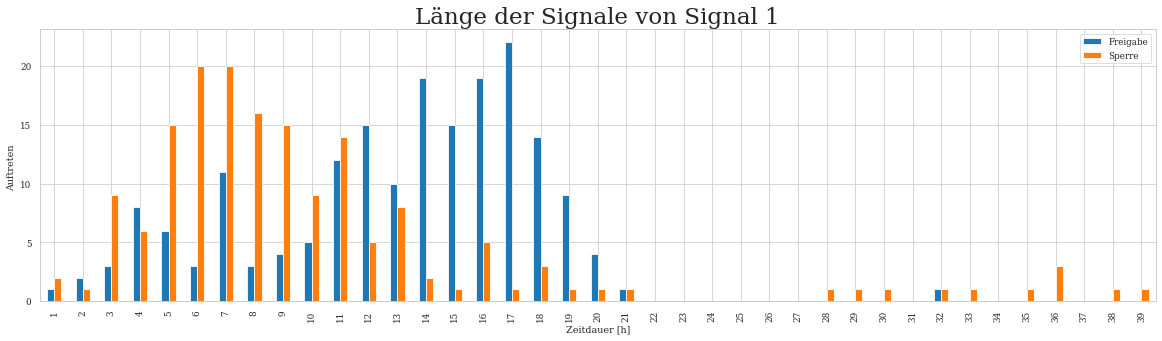

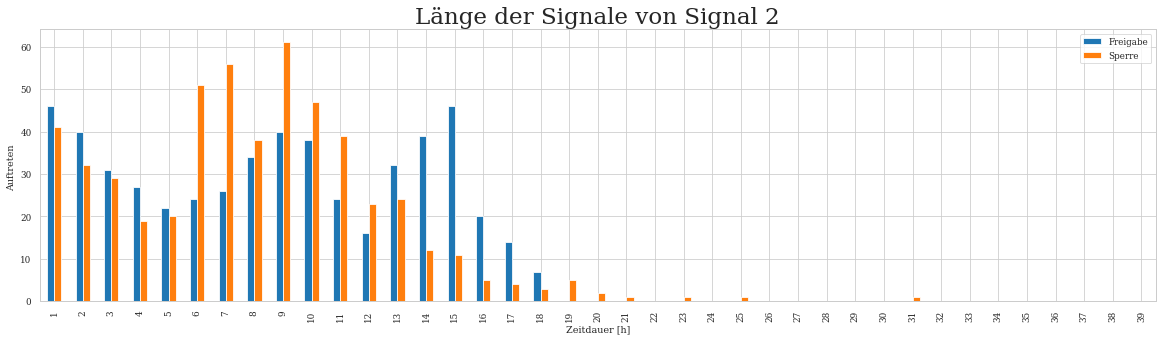

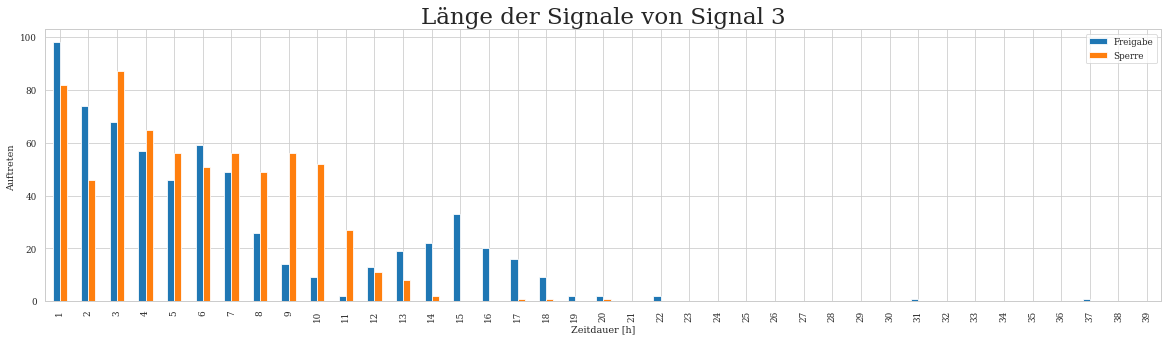

In [5]:
for i in range(0,len(sdf[1])):
    res = f.all_lengths(sdf[1][i]['signal'])
    res[1:40].plot(kind = 'bar', figsize=(20,5))
    plt.title('Länge der Signale von ' + sdf[0][i], fontsize = 23)
    plt.xlabel('Zeitdauer [h]')
    plt.ylabel('Auftreten ')
    #res.to_csv('pathtofolder/ZD_'+ sdf[0][i].csv)

## Zusammenhang mit der Residuallast
- Freigabe RES > 0 gibt an, zu wie vielen Stunden das Schaltsignal Freigabe gibt und die Residuallast positiv ist
- Freigabe RES < 0 gibt an, zu wie vielen Stunden das Schaltsignal Freigabe gibt und die Residuallast negativ ist
- Sperre RES > 0 gibt an, zu wie vielen Stunden das Schaltsignal eine Sperre ausgibt und die Residuallast positiv ist
- Sperre RES < 0 gibt an, zu wie vielen Stunden das eine Sperre ausgibt und die die Residuallast negativ ist
- Anteil Sperre RES < 0 gibt an, welcher Anteil der negativen Residuallast eine Sperre auslöst $\rightarrow$ sollte minimal sein
- Anteil Freigabe RES > 0 gibt an, welcher Anteil der positiven Residuallast eine Freigabe auslöst $\rightarrow$ abhängig von der Zeitreihe der Residuallast nicht zu klein

In [6]:
f.signal_res(sdf, resload)

,Name,Freigabe RES > 0,Freigabe RES < 0,Sperre RES > 0,Sperre RES < 0,Anteil Sperre RES < 0,Anteil Freigabe RES > 0
0,Signal 1,172.0,3285.0,5147.0,155.0,0.045,0.032
1,Signal 2,1862.0,6184.0,8776.0,696.0,0.101,0.175
2,Signal 3,3580.0,9503.0,12377.0,817.0,0.079,0.224
